# Analyse graphique de DVF pour Paris

In [7]:
import pandas as pd
pd.set_option("max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
import geopandas as gdp
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Need : mapclassify

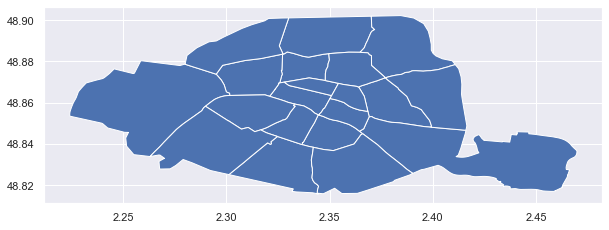

In [8]:
paris= gdp.read_file("data/map/paris/arrondissements.shp")
paris["c_arinsee"]= paris["c_arinsee"].apply(int)
paris_crs= {'init': 'epsg:4326'}
paris.plot(figsize= (10, 10))
plt.show()

In [9]:
mutation_geolocpoint= gdp.read_file("data/unziped_csv/r11/r11_mutation_geomlocmut.shp")
mutation_geolocpoint.columns= map(str.lower, mutation_geolocpoint)
mutation_geolocpoint["geometry"]= mutation_geolocpoint["geometry"].to_crs(epsg=4326)

mutation_geolocpoint.crs= paris_crs
# mutation_geolocpoint.plot()

C:\Users\wenceslas\anaconda3\envs\cours\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
mutation_geolocpar= gdp.read_file("data/unziped_csv/r11/r11_mutation_geompar.shp")
mutation_geolocpar.columns= map(str.lower, mutation_geolocpar)
mutation_geolocpar["geometry"]= mutation_geolocpar["geometry"].to_crs(epsg=4326)

mutation_geolocpoint.crs= paris_crs
# mutation_geolocpar.plot()

C:\Users\wenceslas\anaconda3\envs\cours\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
paris_mutation= pd.read_csv("data/unziped_csv/r11/r11_amutation.csv")
# We only keep Mutation done at Paris
paris_mutation= paris_mutation[paris_mutation["coddep"] == 75].reset_index(drop= True)
paris_mutation.head()

,idmutation,idmutinvar,idopendata,idnatmut,codservch,refdoc,datemut,anneemut,moismut,coddep,libnatmut,nbartcgi,l_artcgi,vefa,valeurfonc,nbdispo,nblot,nbcomm,l_codinsee,nbsection,l_section,nbpar,l_idpar,nbparmut,l_idparmut,nbsuf,sterr,l_dcnt,nbvolmut,nblocmut,l_idlocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien
0,5863434,6db153bc881f7f65454f7ee39728a06c,6db153bc881f7f65454f7ee39728a06c,1,NaN,NaN,2014-05-13,2014,5,75,Vente,0,NaN,f,3.533931e+07,1,0,1,{75115},1,{ER},1,{75115000ER0123},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,BATI - INDETERMINE : Vente avec volume(s)
1,5454034,1791301cde144e9854412489de4c1d14,1791301cde144e9854412489de4c1d14,1,NaN,NaN,2017-03-07,2017,3,75,Vente,0,NaN,f,2.070000e+05,1,3,1,{75118},1,{BU},1,{75118000BU0076},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751180006735170_0},0,1,0,0,0,0,1,0,0,0,0,0,0,0,39,0,39,0,0,0,39,0,0,0,0,0,0,0,121,UN APPARTEMENT
2,5473270,8227f4dadd6aec370b48546f8df6705f,8227f4dadd6aec370b48546f8df6705f,1,NaN,NaN,2017-08-28,2017,8,75,Vente,0,NaN,f,5.920000e+05,1,1,1,{75101},1,{AL},1,{75101000AL0008},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751010006689148_0},0,0,0,1,0,0,0,0,0,0,0,0,0,0,50,0,0,50,0,0,0,0,0,0,0,0,0,0,14,ACTIVITE
3,5183819,94a21f1c1cce2336e421e85169b54338,94a21f1c1cce2336e421e85169b54338,1,NaN,NaN,2019-11-27,2019,11,75,Vente,0,NaN,f,2.200000e+05,1,2,1,{75115},1,{CS},1,{75115000CS0085},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751150006301989_0},0,1,0,0,0,1,0,0,0,0,0,0,0,0,21,0,21,0,0,21,0,0,0,0,0,0,0,0,121,UN APPARTEMENT
4,5737461,4b91cd50ffc5bb67fb9f5de2b9c6c8c6,4b91cd50ffc5bb67fb9f5de2b9c6c8c6,1,NaN,NaN,2015-01-28,2015,1,75,Vente,0,NaN,f,2.040000e+08,1,0,1,{75113},1,{CF},1,{75113000CF0027},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,BATI - INDETERMINE : Vente avec volume(s)


## Rapide analyse du fichier mutation

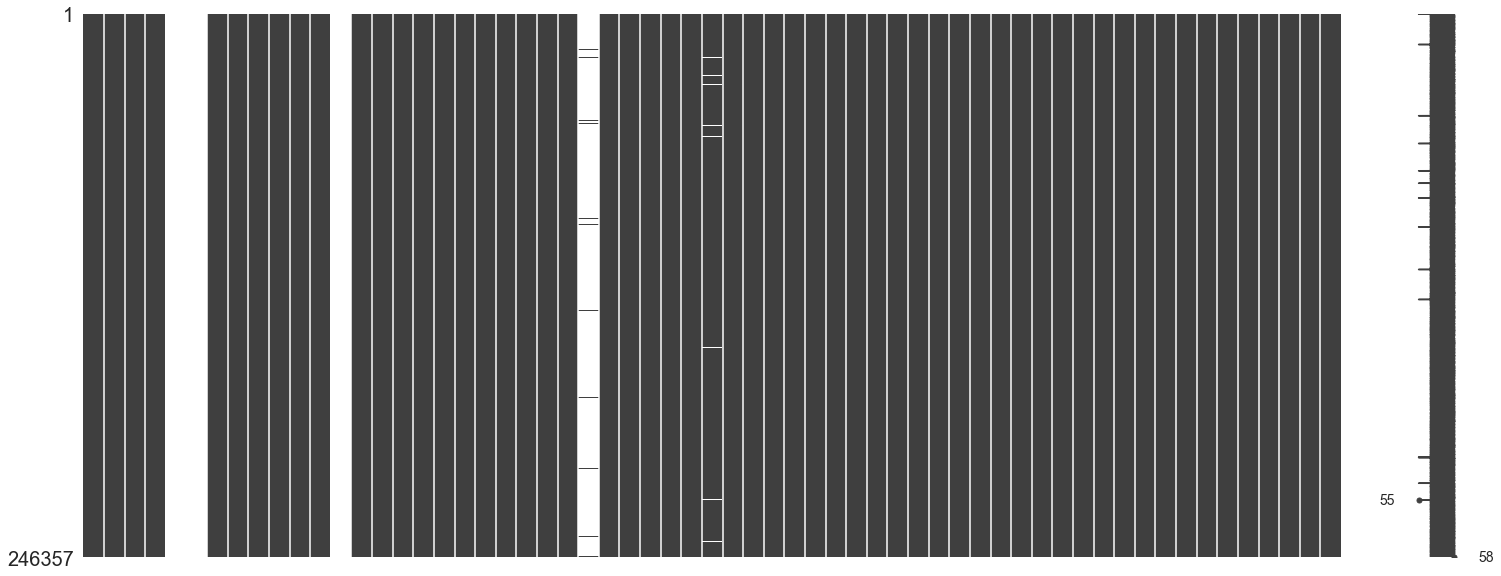

In [13]:
msno.matrix(paris_mutation)
plt.show()

In [65]:
paris_mutation["datemut"]= pd.to_datetime(paris_mutation["datemut"], format= "%Y-%m-%d")

mindat= str(paris_mutation["datemut"].min())
maxdat= str(paris_mutation["datemut"].max())

Notre période d'étude est : {{mindat}} - {{maxdat}}

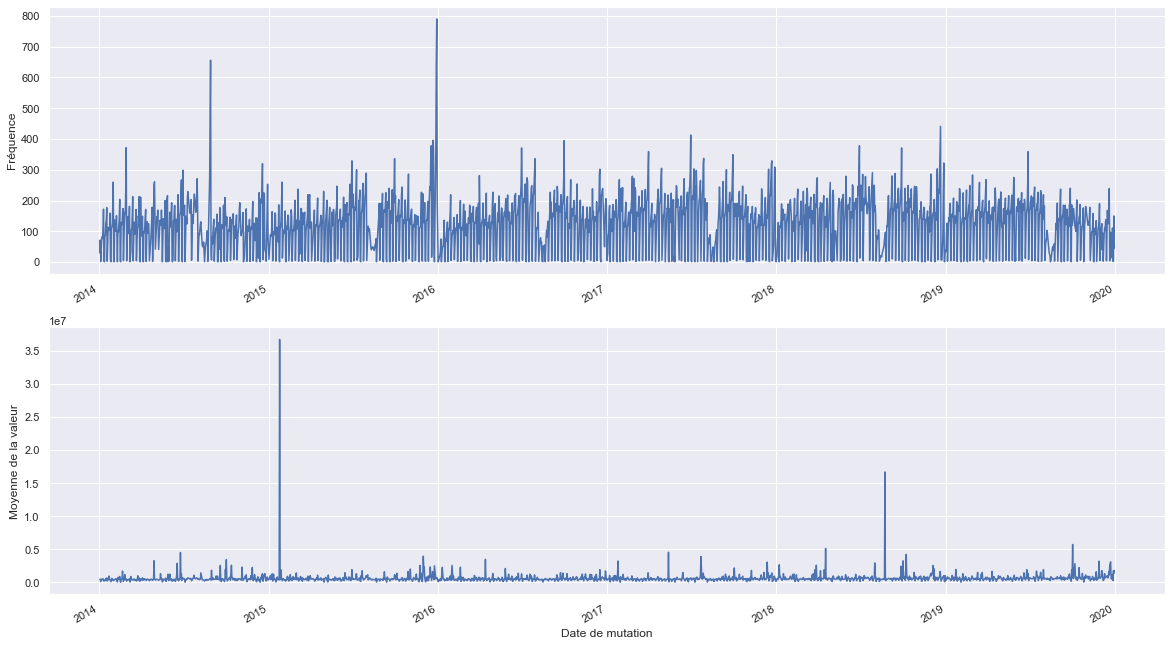

In [58]:
grouped_datemut= paris_mutation.groupby(["datemut"])

fig, ax= plt.subplots(2, 1, figsize= (20, 12))

grouped_datemut.count()["idmutation"].plot(ax= ax[0])
ax[0].set_xlabel("")
ax[0].set_ylabel("Fréquence")

grouped_datemut.mean()["valeurfonc"].plot(ax= ax[1])
ax[1].set_xlabel("Date de mutation")
ax[1].set_ylabel("Moyenne de la valeur")

plt.show()

On a une fréquence d'observation plutôt stable dans le temps, tout comme la moyenne à quelques dates mois près.

In [67]:
paris_mutation["libtypbien"].value_counts()/paris_mutation.shape[0]

UN APPARTEMENT                               0.725873
UNE DEPENDANCE                               0.105221
ACTIVITE                                     0.063335
DEUX APPARTEMENTS                            0.038801
BATI MIXTE - LOGEMENT/ACTIVITE               0.015819
DES DEPENDANCES                              0.015141
APPARTEMENT INDETERMINE                      0.014211
BATI - INDETERMINE : Vefa sans descriptif    0.013984
UNE MAISON                                   0.003523
BATI - INDETERMINE : Vente avec volume(s)    0.002878
TERRAIN ARTIFICIALISE MIXTE                  0.000576
TERRAIN DE TYPE TAB                          0.000252
BATI MIXTE - LOGEMENTS                       0.000199
DES MAISONS                                  0.000126
TERRAIN DE TYPE RESEAU                       0.000032
TERRAIN D'AGREMENT                           0.000024
MAISON - INDETERMINEE                        0.000004
Name: libtypbien, dtype: float64

In [68]:
assert paris_mutation["idmutation"].nunique() == paris_mutation.shape[0]

In [70]:
paris_mutation["libnatmut"].value_counts()/paris_mutation.shape[0]

Vente                                 0.970632
Vente en l'état futur d'achèvement    0.022228
Echange                               0.004075
Adjudication                          0.002906
Vente terrain à bâtir                 0.000110
Expropriation                         0.000049
Name: libnatmut, dtype: float64

La plus grosse partie des mutations sont des ventes d'appartement ou bien de dépendance (garage, place de parking etc.).

## Mapping des données

In [71]:
print(paris_mutation["l_codinsee"].unique())
# Some mutation appears in two arrondissement, so we created 2 columns, the second with a different
# value if it has two arrondissement
paris_mutation["arr1"]= paris_mutation["l_codinsee"].str.replace("{", "").str.replace("}", "")\
.str[:5].apply(int)

paris_mutation["arr2"]= paris_mutation["l_codinsee"].str.replace("{", "").str.replace("}", "")\
.apply(lambda x: int(x[6:]) if len(x) > 6 else int(x[:5]))

print((paris_mutation["arr1"] != paris_mutation["arr2"]).sum())

['{75115}' '{75118}' '{75101}' '{75113}' '{75111}' '{75116}' '{75117}'
 '{75119}' '{75110}' '{75103}' '{75106}' '{75120}' '{75109}' '{75104}'
 '{75105}' '{75102}' '{75107}' '{75108}' '{75114}' '{75112}'
 '{75105,75106}' '{75119,75120}' '{75103,75108}' '{75109,75110}'
 '{75101,75103}' '{75111,75112}' '{75102,75104}' '{75101,75108}'
 '{75105,75107}' '{75106,75107}']
79


In [72]:
paris_mutation= gdp.GeoDataFrame(paris_mutation)

In [73]:
paris_mutation= paris_mutation.merge(mutation_geolocpoint, how= "left", on= "idmutation")
paris_mutation= paris_mutation.rename(columns= {"geometry": "geometry_point"})

In [74]:
paris_mutation= paris_mutation.merge(mutation_geolocpar, how= "left", on= "idmutation")
paris_mutation= paris_mutation.rename(columns= {"geometry": "geometry_par"})

# We can swap geometry col with this formula
paris_mutation.geometry_point.crs= paris_crs
paris_mutation.geometry= paris_mutation.geometry_point

In [133]:
def plot_points_on_paris(df, col= "valeurfonc", city= paris, arr= "c_ar", show_arr= True):
    """
    
    """
    # dependence from mpl_toolkits.axes_grid1 import make_axes_locatable
    hfont= {'fontname':'Helvetica'} # import a new fontstyle
    ax= city.plot(figsize= (20, 20), color= 'lightgrey', linewidth= 0.5, edgecolor= 'white',)
    ax.axis("off")
    
    if show_arr:
    # Name arrondissement
        city_copy= city.copy()
        city_copy['geometry'] = city_copy['geometry'].centroid # we take the center of each arrondissment
        for arrondissement in city.index:
            city_loc= city_copy.iloc[arrondissement, :]
            ax.text(y= float(city_loc.geometry.y), x= float(city_loc.geometry.x)
                    , s= str(int(city_loc[arr]))+"eme", **hfont, color= "black", alpha= 0.5)
    
    # Manage legend size
    divider= make_axes_locatable(ax)
    cax= divider.append_axes("right", size= "5%", pad= 0.1)

    df.plot(ax= ax, markersize= 100#, color= "purple"
                             , alpha= 0.7, linewidth= 2, column= "valeurfonc"
                             , cmap= "gnuplot", legend= True
                             , cax= cax)
    ax.set_title(col+" on Paris", loc= "center", wrap= True, fontsize= 20, **hfont)
    
    plt.show()

In [134]:
def top_n_val(df, col= "valeurfonc", n= 10):
    """
    
    """
    df= df.reset_index(drop= True)
    top_n_highest_price= df[col].sort_values(ascending= False).head(n)
    top_n_highest_price= df.iloc[top_n_highest_price.index, :]
    
    return top_n_highest_price

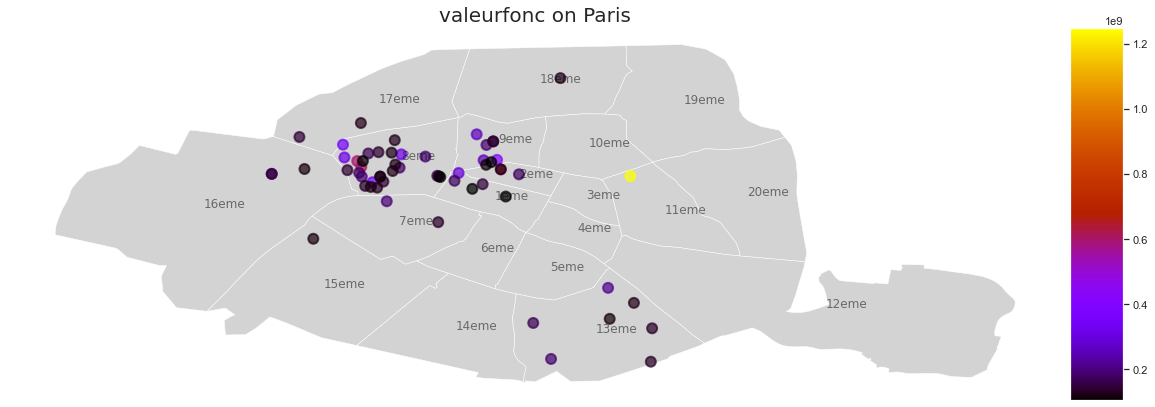

In [135]:
plot_points_on_paris(top_n_val(paris_mutation, n= 100)
                     , city= paris)

Voici la répartition dans Paris du top 100 des biens de la table DVF. On remarque que ces points sont localisés autour du 8ème arrondissement. On observe une valeur aberante en <font color='yellow'>jaune</font> dans le 11ème (avec une valeur de plus d'un milliard d'€). Au delà, tous les points représentent aussi des valeurs élevées avec un max de 1.25 milliard d'€ et un min de 106 millions. Certains de ces points ne sont donc pas des appartements, mais probablement des immeubles entiers.

Que se passe t-il avec la répartition de ces points dans Paris si on se sépare des valeurs foncières très élevées ?

In [136]:
top_n_val(paris_mutation, n= 100)["libtypbien"].value_counts()/100

BATI - INDETERMINE : Vente avec volume(s)    0.41
ACTIVITE                                     0.36
BATI MIXTE - LOGEMENT/ACTIVITE               0.21
BATI - INDETERMINE : Vefa sans descriptif    0.01
TERRAIN ARTIFICIALISE MIXTE                  0.01
Name: libtypbien, dtype: float64

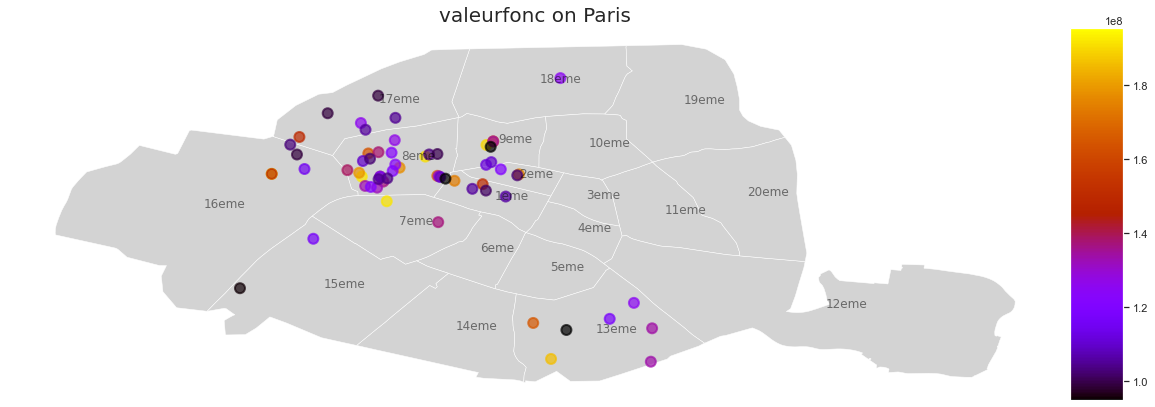

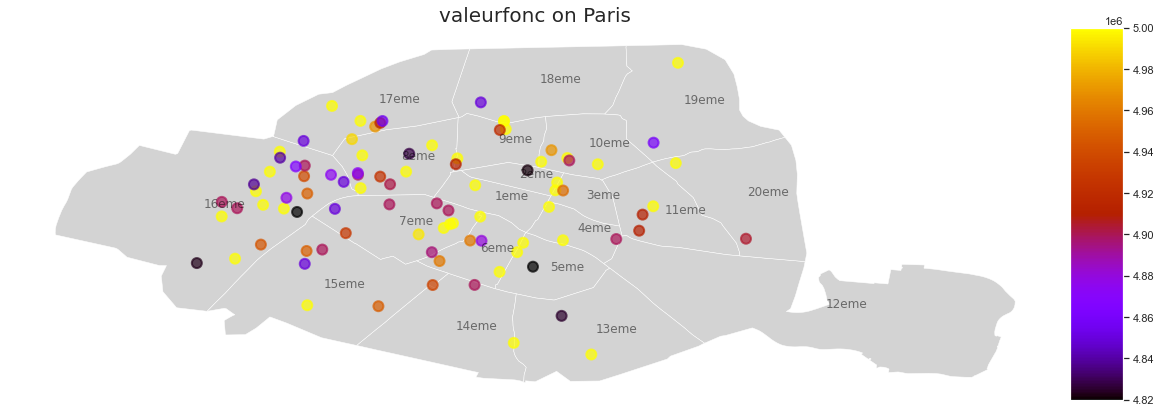

In [137]:
plot_points_on_paris(top_n_val(paris_mutation[paris_mutation["valeurfonc"] <= 2e+08]
                               , n= 100)
                     , city= paris)

plot_points_on_paris(top_n_val(paris_mutation[paris_mutation["valeurfonc"] <= 5e+06]
                               , n= 100)
                     , city= paris)

La première map représente le top 100 des valeurs inférieures ou égales à 200 millions d'€ et la seconde inférieures égales à 5 millions. Les logements les plus chères se situent toujours dans le 1er, le 2ème, le 8ème et le 9ème arrondissement.

Quand on se restreint aux valeurs inférieures à 5 millions, la dispersion est un peu plus homogène, mais toujours avec une densité de points plus forte à l'Ouest de la Ville Lumière. Le problème avec ces points et les valeurs foncières qu'ils représentent, c'est que certaines actions de vente ont été faites par des promoteurs, des entreprises ... qui n'ont évidemment par le même budget qu'un particulier. On va donc représenter les mêmes graphiques, mais en considérant cette fois-ci le type de bien :

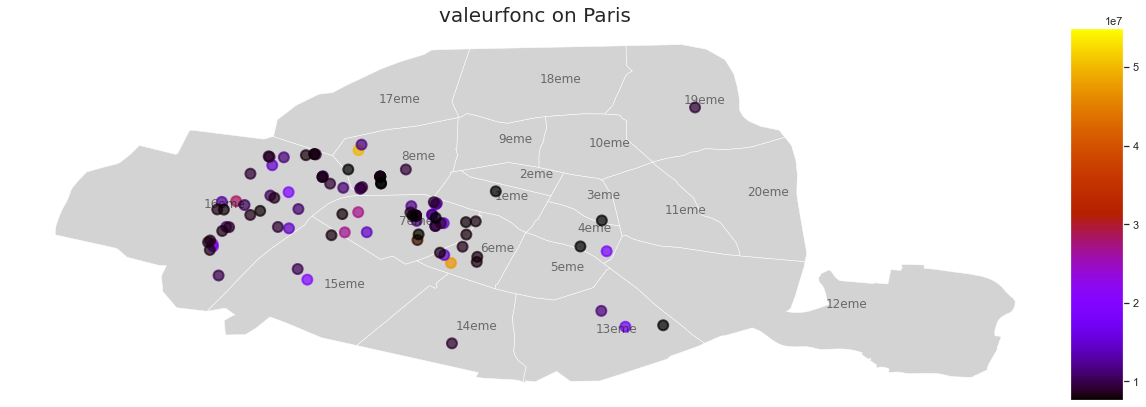

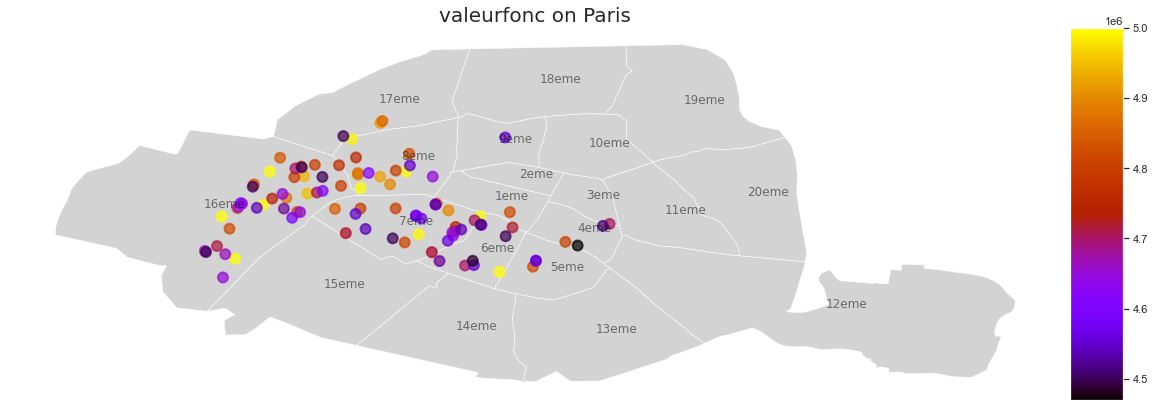

In [141]:
type_bien= ["UN APPARTEMENT", "UNE MAISON", "UNE DEPENDANCE"]
plot_points_on_paris(top_n_val(paris_mutation[paris_mutation["libtypbien"].isin(type_bien)]
                               , n= 100)
                     , city= paris)
plot_points_on_paris(top_n_val(paris_mutation[paris_mutation["libtypbien"].isin(type_bien) \
                                              & (paris_mutation["valeurfonc"] <= 5e+06)]
                               , n= 100)
                     , city= paris)

On remarque que les logements / dépendances les plus chères sont localisés aux mêmes endroits : 0 l'Est du 16ème, puis dans le 6, 7, 8 et 9 ème arrondissement. Ce n'est pas aberrant de voir une telle concentration de logement couteux dans ce secteur : ce sont les Beaux Quartiers résidentiels de Paris !